# This case study is to predict Rented Bike Count per hour based on data provided

In [126]:
#Importing librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [325]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\kulka'

In [127]:
#Importing data file
seol_bike_data=pd.read_excel("D:\\SeoulBikeData.xls")
seol_bike_data

,Date,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [128]:
#dimensions od data file
seol_bike_data.shape

(8760, 14)

In [129]:
#Listing all the columns(features) in the data file
seol_bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(∞C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(∞C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [130]:
#Checking for inconsistencies in data like NaN values across all features
seol_bike_data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(∞C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(∞C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

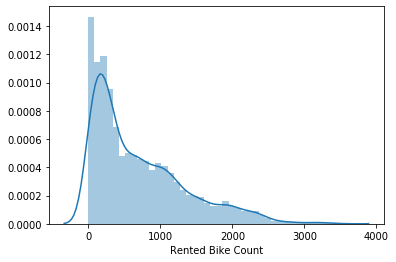

In [132]:
sns.distplot(seol_bike_data["Rented Bike Count"])

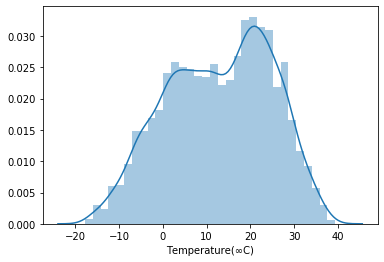

In [141]:
sns.distplot(seol_bike_data["Temperature(∞C)"])

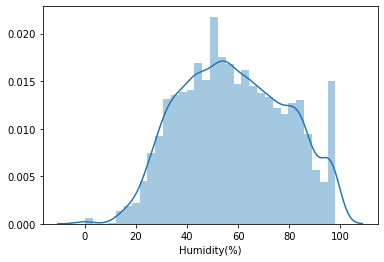

In [152]:
sns.distplot(seol_bike_data["Humidity(%)"])

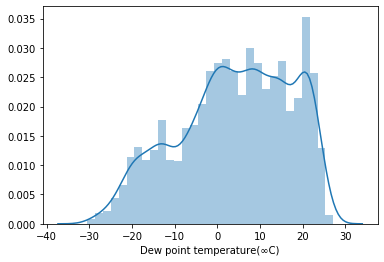

In [153]:
sns.distplot(seol_bike_data["Dew point temperature(∞C)"])

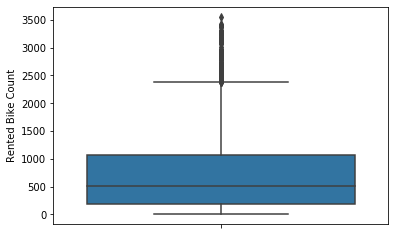

In [133]:
 sns.boxplot(y=seol_bike_data["Rented Bike Count"])

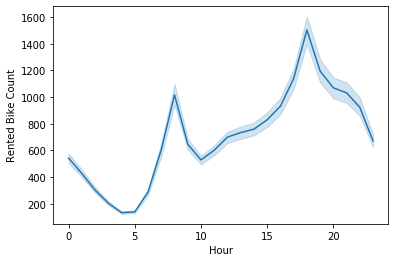

In [211]:
#ns.scatterplot(data=seol_bike_data, x="Hour", y="Rented Bike Count",hue='Hour',size='Hour',sizes=(10,50))
sns.lineplot(data=seol_bike_data, x="Hour", y="Rented Bike Count")


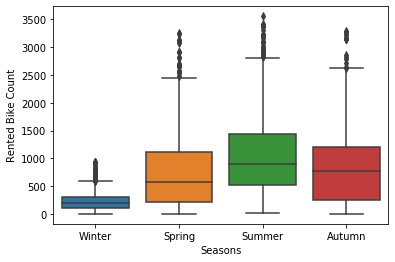

In [135]:
 sns.boxplot(x=seol_bike_data["Seasons"],y=seol_bike_data["Rented Bike Count"])

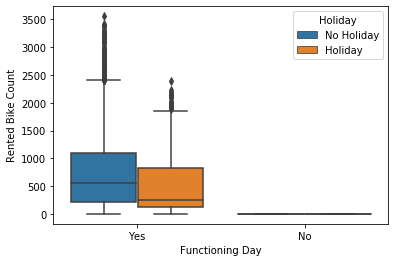

In [136]:
sns.boxplot(x="Functioning Day", y="Rented Bike Count",hue="Holiday",data=seol_bike_data)

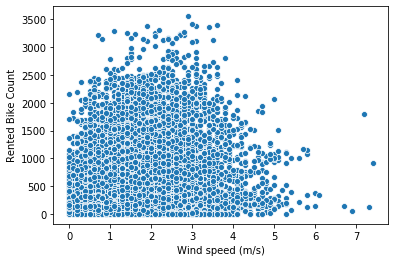

In [137]:
sns.scatterplot(x="Wind speed (m/s)", y="Rented Bike Count",data=seol_bike_data)

In [322]:
#Seasons	Holiday	Functioning Day

two_way_table = pd.crosstab(index=seol_bike_data['Functioning Day'],columns=seol_bike_data['Seasons'],dropna=False)
two_way_table

Seasons,Autumn,Spring,Summer,Winter
Functioning Day,,,,
No,247,48,0,0
Yes,1937,2160,2208,2160


In [323]:
#Checking  for Chi-Square distribution with 95% confidence interval

from scipy.stats import chi2_contingency,chi2
chi2.ppf(1-0.05,14) #14 total feature count or columns
chi2_contingency(two_way_table)

(585.2066161470536,
 1.62305344566663e-126,
 3,
 array([[  73.54794521,   74.35616438,   74.35616438,   72.73972603],
        [2110.45205479, 2133.64383562, 2133.64383562, 2087.26027397]]))

In [294]:
pd.crosstab(seol_bike_data['Functioning Day'],seol_bike_data['Holiday'],
            seol_bike_data['Rented Bike Count'],dropna=False, aggfunc='mean') #aggfunc can be mean,sum,min,max

Holiday,Holiday,No Holiday
Functioning Day,,
No,0.000000,0.00000
Yes,529.154412,739.28497


In [301]:
#col = [ 'Rented Bike Count', 'Hour', 'Temperature(∞C)', 'Humidity(%)',
     #  'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(∞C)',
    #   'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
    
#Finding Covariance among continous variables    

seol_bike_data[['Visibility (10m)','Dew point temperature(∞C)','Wind speed (m/s)',
                'Solar Radiation (MJ/m2)','Rainfall(mm)', 'Snowfall (cm)']].cov()

,Visibility (10m),Dew point temperature(∞C),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Visibility (10m),370027.323001,-1403.253586,108.114660,79.130141,-115.040313,-32.330842
Dew point temperature(∞C),-1403.253586,170.573247,-2.388639,1.070865,1.850620,-0.860668
Wind speed (m/s),108.114660,-2.388639,1.073918,0.299140,-0.023002,-0.001609
Solar Radiation (MJ/m2),79.130141,1.070865,0.299140,0.754720,-0.072813,-0.027432
Rainfall(mm),-115.040313,1.850620,-0.023002,-0.072813,1.272819,0.004188
Snowfall (cm),-32.330842,-0.860668,-0.001609,-0.027432,0.004188,0.190747


In [310]:
seol_bike_data['Visibility (10m)'].corr(seol_bike_data['Solar Radiation (MJ/m2)'],method='pearson')

0.1497380256010565

In [311]:
seol_bike_data['Visibility (10m)'].corr(seol_bike_data['Wind speed (m/s)'],method='pearson')

0.17150713663056233

In [312]:
seol_bike_data['Dew point temperature(∞C)'].corr(seol_bike_data['Solar Radiation (MJ/m2)'],method='spearman')

0.09400874733967801

In [313]:
seol_bike_data['Dew point temperature(∞C)'].corr(seol_bike_data['Rainfall(mm)'],method='spearman')

0.21348125802479131

In [314]:
seol_bike_data['Wind speed (m/s)'].corr(seol_bike_data['Solar Radiation (MJ/m2)'],method='kendall')

0.26488632455032984

In [315]:
seol_bike_data[['Visibility (10m)','Dew point temperature(∞C)','Wind speed (m/s)',
                'Solar Radiation (MJ/m2)','Rainfall(mm)', 'Snowfall (cm)']].corr()

,Visibility (10m),Dew point temperature(∞C),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Visibility (10m),1.000000,-0.176630,0.171507,0.149738,-0.167629,-0.121695
Dew point temperature(∞C),-0.176630,1.000000,-0.176486,0.094381,0.125597,-0.150887
Wind speed (m/s),0.171507,-0.176486,1.000000,0.332274,-0.019674,-0.003554
Solar Radiation (MJ/m2),0.149738,0.094381,0.332274,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.167629,0.125597,-0.019674,-0.074290,1.000000,0.008500
Snowfall (cm),-0.121695,-0.150887,-0.003554,-0.072301,0.008500,1.000000


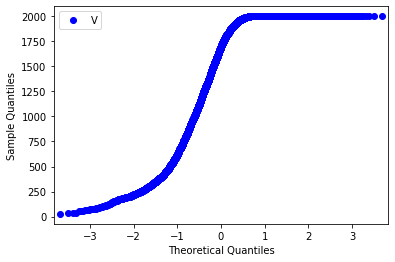

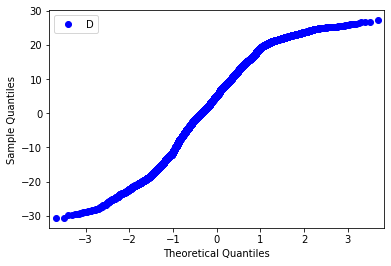

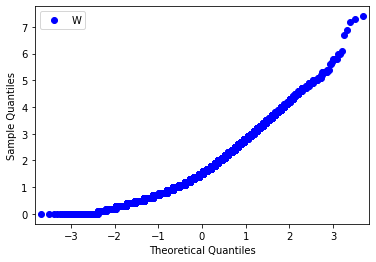

In [317]:
import statsmodels.api as sm

sm.qqplot(seol_bike_data['Visibility (10m)'])
plt.legend("Visibility (10m)")
plt.show()
sm.qqplot(seol_bike_data['Dew point temperature(∞C)'])
plt.legend("Dew point temperature(∞C)")
plt.show()
sm.qqplot(seol_bike_data['Wind speed (m/s)'])
plt.legend("Wind speed (m/s)")
plt.show()

In [158]:
seol_bike_data_greaterthan_zero = seol_bike_data[seol_bike_data["Dew point temperature(∞C)"]>0]
seol_bike_data_greaterthan_zero.shape

(5562, 14)

In [290]:
seol_bike_data_lesserthan_zero = seol_bike_data[seol_bike_data["Dew point temperature(∞C)"]==0]
seol_bike_data_lesserthan_zero.shape

(60, 14)

In [291]:
seol_bike_data_lesserthan_zero = seol_bike_data[seol_bike_data["Dew point temperature(∞C)"]<0]
seol_bike_data_lesserthan_zero.shape

(3138, 14)

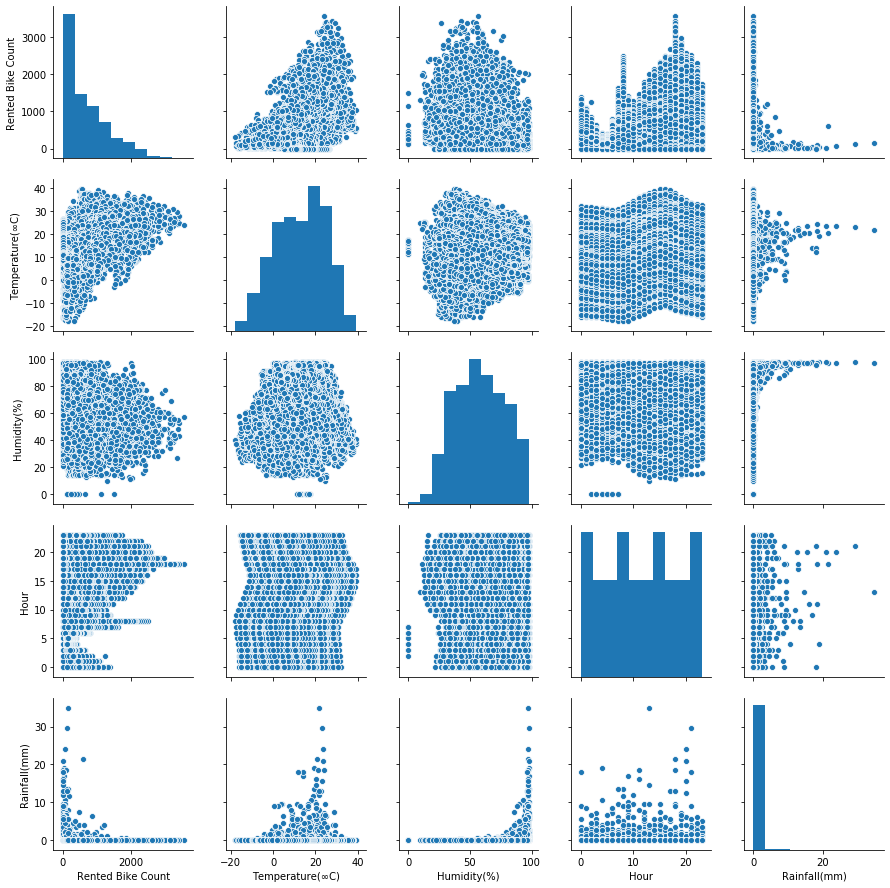

In [138]:
sns.pairplot(seol_bike_data,vars=["Rented Bike Count","Temperature(∞C)","Humidity(%)","Hour","Rainfall(mm)"])